In [1]:
import numpy as np
from utils.data_types import *
from utils.ros_helper import *
from ekf_estimator.ekf_rio_filter import *
import matplotlib.pyplot as plt
import scipy

idx test

navigation solution test

In [2]:
nav_sol = NavigationSolution()
print(nav_sol.get_position_n_b())
print(nav_sol.get_quaternion_n_b())
print(nav_sol.get_euler_n_b())
print(nav_sol.get_c_n_b())
print(nav_sol.get_pose())
print(nav_sol.get_velocity_ros())
nav_sol.get_pose_ros()

[0. 0. 0.]
[0. 0. 0. 1.]
[0. 0. 0.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[ 0. -0. -0.]


array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.0000000e+00, -1.2246468e-16,  0.0000000e+00],
       [ 0.0000000e+00,  1.2246468e-16, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

System Noise Psd

In [3]:
snp = SystemNoisePsd()


Strapdown

In [4]:
st = Strapdown(9.8)
ab = np.zeros(3)
wb = np.zeros(3)
dt = 1e-3


In [5]:
st.propagate(nav_sol, ab, wb, dt)
# R.from_quat(np.array([1,0,0,1])).as_quat()

In [6]:
from ekf_estimator.ekf_rio_ros import *

In [7]:
x = np.array([1,2])
np.power(x, 2)

array([1, 4])

In [8]:
inits = InitStruct()
idx = EkfRioFilterStateIdx(); config = Ekf_Rio_config()
inits.configure(idx, config )


True

In [9]:
l = [0,1]
l.pop(0)
l.append(2)
l.pop(0)
l

[2]

# BAG

In [10]:
import rosbag
bag = rosbag.Bag('../ekf_rio_demo/vicon_easy.bag')

In [11]:
topics = [ '/sensor_platform/baro']
for topic, msg, timestamp in bag.read_messages(topics=topics):
    print(type(msg))

<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>
<class 'tmpdaod9grb._sensor_msgs__FluidPressure'>


In [12]:
np.rad2deg(-0.000872665)

-0.050000021428783986

In [13]:
ekf_rio = EKF_RIO()
ts, position, poses, velocity = ekf_rio.runFromRosbag('../ekf_rio_demo/vicon_easy.bag')

IMU initialized! and T init is 10.001560926437378
Did not received a trigger for the radar data. Rejecting!
Did not received a trigger for the radar data. Rejecting!
Did not received a trigger for the radar data. Rejecting!


In [14]:
def plot(ts, var, name):    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

    # Plot on the first subplot
    ax1.plot(ts, var[:,0])

    # Plot on the second subplot
    ax2.plot(ts, var[:,1])

    # Plot on the third subplot
    ax3.plot(ts, var[:,2])

    # Add grids to all subplots
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    # add titles
    ax1.set_ylabel(f'{name}_x')
    ax2.set_ylabel(f'{name}_y')
    ax3.set_ylabel(f'{name}_z')
    # Show the figure
    plt.show()

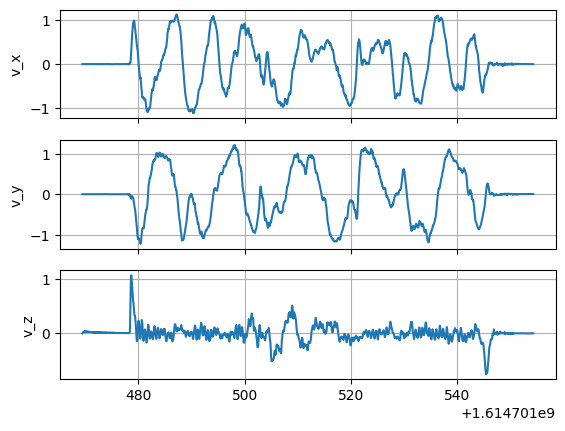

In [15]:
plot(ts, velocity, 'v')

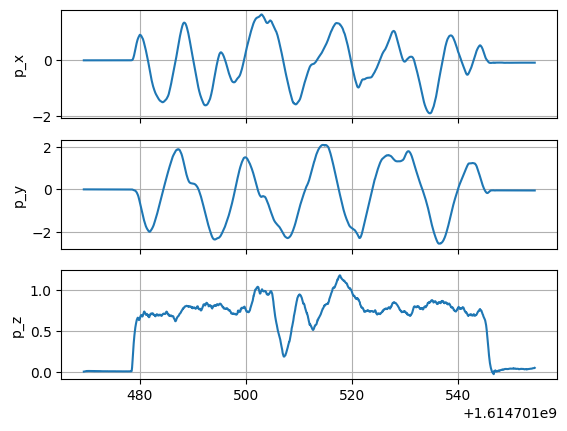

In [16]:
plot(ts, position, 'p')

In [23]:
ekf_rio.ekf_rio_filter_.T_b_r_

array([[-0.02118664,  0.99956425,  0.02055336,  0.05294324],
       [ 0.99976558,  0.02109017,  0.00489882,  0.04032161],
       [ 0.00446321,  0.02065233, -0.99977676, -0.05778559],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [18]:
A = np.array([[0, -1, 0], [-1, 0 , 0], [0, 0, -1]])
A @ np.array([1,2,3])

array([-2, -1, -3])